In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)

print(data_path)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset/Superstore Dataset.xlsx


In [90]:
data = pd.read_excel(data_path, sheet_name = 'Orders')
columns = ['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'State', 'City', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit']
data = data[columns]

In [91]:
dfs = []

cat_columns = ['Product ID','Customer ID', 'State', 'Region', 'City', 'Category']

for column in cat_columns:
    
    temp_df = data.groupby(column).sum()
    temp_df = temp_df.sort_values('Profit', ascending = False)
    dfs.append(temp_df)
    
for df in dfs:
    
    print(df['Profit'].head(10))
    print('\n')

Product ID
TEC-CO-10004722    25199.9280
TEC-CO-10001449     6407.8932
TEC-MA-10001047     3717.9714
TEC-MA-10001127     2799.9840
OFF-BI-10001359     2753.7593
TEC-MA-10003979     2400.9657
OFF-AP-10002945     2396.1805
TEC-AC-10003033     2062.1875
TEC-CO-10003763     1889.9730
TEC-AC-10002049     1856.6766
Name: Profit, dtype: float64


Customer ID
TC-20980    8764.9483
RB-19360    6976.0959
HL-15040    5174.3968
AB-10105    5088.9448
TA-21385    4523.3625
AR-10540    2617.2154
DR-12940    2549.7344
SE-20110    2436.9525
BS-11365    2405.3645
KD-16270    2318.7099
Name: Profit, dtype: float64


State
California    49372.1750
New York      41012.0212
Washington    21466.6555
Michigan      17480.2806
Indiana       15524.6596
Georgia        9994.4165
Virginia       9657.4876
New Jersey     7213.0952
Delaware       7029.9107
Kentucky       5968.3840
Name: Profit, dtype: float64


Region
West       67860.5630
East       53372.1575
Central    27450.0071
South      26551.7163
Name: Profit,

In [92]:
data.describe()

for column in data.columns.to_list():
    
    print_that = {
        'Column': str(column),
        'Number of Unique': len(data[str(column)].unique())
    }
    
    print(print_that)
    print('\n')

{'Column': 'Order Date', 'Number of Unique': 641}


{'Column': 'Ship Date', 'Number of Unique': 689}


{'Column': 'Ship Mode', 'Number of Unique': 4}


{'Column': 'Customer ID', 'Number of Unique': 773}


{'Column': 'Customer Name', 'Number of Unique': 773}


{'Column': 'Segment', 'Number of Unique': 3}


{'Column': 'Country', 'Number of Unique': 1}


{'Column': 'State', 'Number of Unique': 49}


{'Column': 'City', 'Number of Unique': 452}


{'Column': 'Region', 'Number of Unique': 4}


{'Column': 'Product ID', 'Number of Unique': 1755}


{'Column': 'Category', 'Number of Unique': 3}


{'Column': 'Sub-Category', 'Number of Unique': 17}


{'Column': 'Product Name', 'Number of Unique': 1742}


{'Column': 'Sales', 'Number of Unique': 4165}


{'Column': 'Quantity', 'Number of Unique': 14}


{'Column': 'Profit', 'Number of Unique': 4838}




NameError: name 'plt' is not defined

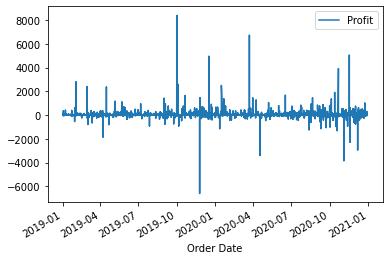

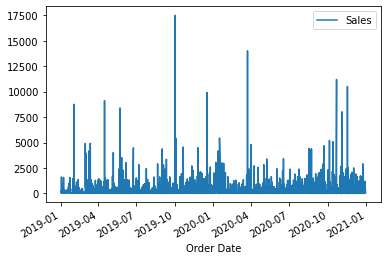

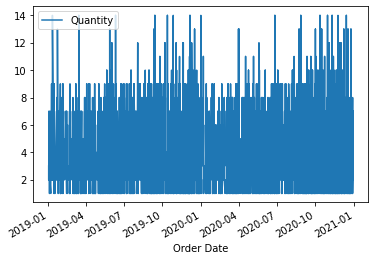

In [93]:
profit = data[['Order Date', 'Profit']]
sales = data[['Order Date', 'Sales']]
quantities = data[['Order Date', 'Quantity']]

profit.set_index('Order Date', inplace = True)
sales.set_index('Order Date', inplace = True)
quantities.set_index('Order Date', inplace = True)

profit.plot()
print('\n')
sales.plot()
print('\n')
quantities.plot()
plt.show()

In [94]:
october = data[(data['Order Date'] >= '2019-10-01') & (data['Order Date'] <= '2019-10-30')]
october = october.sort_values('Order Date', ascending = True)
negative = len(data[data['Profit'] <= 0])
positive = len(data[data['Profit'] > 0])
negative = negative / int(len(data['Profit'])) * 100.0
positive = positive / int(len(data['Profit'])) * 100.0
print(f'%{int(positive)} of profit data is positive\n%{int(negative)} of data profit is negative')

%80 of profit data is positive
%19 of data profit is negative


In [95]:
orders = data.groupby('Order Date')['Order Date'].count()
orders = orders.sort_values(ascending = False)
orders = orders[0:15]
#orders.plot(kind = 'barh', color = 'red')

sales = data.groupby('Order Date')['Sales'].sum()
sales = sales.sort_values(ascending = False)
sales = sales[0:15]
sales

Order Date
2019-10-02    18452.9720
2020-10-22    15158.8770
2020-03-23    14816.0680
2020-11-17    13694.8828
2019-12-17    12185.1340
2020-11-04    10668.0960
2019-05-23    10560.9780
2019-12-25    10488.0550
2020-12-02     9951.1820
2020-08-17     9517.2880
2020-09-02     9354.8540
2019-04-16     9335.0860
2019-02-02     8996.7840
2019-03-13     8866.8820
2020-08-21     8551.0540
Name: Sales, dtype: float64

In [96]:
correlations = data.corr()['Sales']
correlations = correlations.sort_values(ascending = False)
correlations

Sales       1.000000
Profit      0.585840
Quantity    0.191503
Name: Sales, dtype: float64

NameError: name 'plt' is not defined

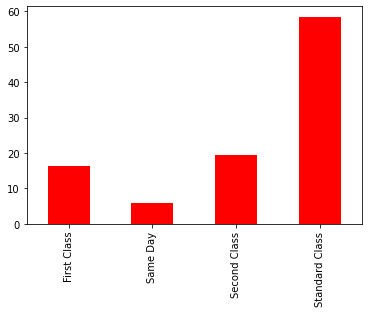

In [97]:
ship_modes = data.groupby('Ship Mode')['Ship Mode'].count()

dict_modes = dict()

for mode in ship_modes.index.to_list():
    
    count = ship_modes[mode]
    calculation = count / len(data['Ship Mode']) * 100.0
    calculation = round(calculation, 1)
    
    #print(f'%{calculation} of shipments are {mode}')
    
    dict_modes[mode] = calculation

df = pd.Series(dict_modes)
df.plot(kind = 'bar', color = 'red')
plt.xlabel('Shipment Type')
plt.ylabel('Percent')
plt.show()

## Lets Create Some Questions for Answering

        * Which cities, states and regions have highest 
        sales numbers and which ones lowest and why lowest
        and highest this cities and states?
        
        * Which cities and states have highest profits and
        which one is lowest profits? What is percentage of
        every cities and states of general profit? 
        
        * Share of percentages of every regions by general
        profits and sales numbers?
        
        * Which users have highest purchase numbers and their
        the other informatives correlations?
        
        * What is best selling product and category of in all
        purchases?
        
        * Which products have high profit and sales
        numbers what is these products categories and names?
        
        * Share of all categories in all sales?
        
        * Share of all products in all sales?
        
        * Which users could be call 'major' users that
        because they're multiple purchases and highest 
        profit and sales values for company?
        
        * Generating all plots about columns and sales,profit
        quantities numerics?
        
        * What percentages of segments from all sales? 
        Consumer or Companies show this with pie chart?

In [99]:
popular_cities = (data.groupby('City')['Sales'].sum()
                   .sort_values(ascending = False))

high_cities = popular_cities.head(10).round(1)
low_cities = popular_cities.tail(10).round(1)

fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(
    go.Bar(x = high_cities.index.to_list(), y = list(high_cities.values), name = 'Highest'),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = low_cities.index.to_list(), y = list(low_cities.values), name = 'Lowest'),
    row=2, col=1
)

fig.update_layout(height=780, width=575, title_text="A Look at The Cities with The Lowest and Highest Sales Figures.")
fig.update_xaxes(title_text = 'City')
fig.update_yaxes(title_text = 'Sales (k)')
fig.show()

In [100]:
#Major Cities Sales and Profits

majors = ['New York City','Los Angeles','Chicago','Houston','Phoenix','Philadelphia','San Antonio','San Diego']
major_cities = data[data['City'].isin(majors)]
major_cities = major_cities.groupby('City')['Sales','Profit'].sum()
major_cities.round(1)

fig = go.Figure(data = [
    go.Bar(name = 'Sales', x = major_cities.index.to_list(), y = list(major_cities['Sales'].values)),
    go.Bar(name = 'Profit', x = major_cities.index.to_list(), y = list(major_cities['Profit'].values))
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text = 'Cities')
fig.update_yaxes(title_text = 'Sales and Profit Value ($k)')
fig.show()

In [101]:
major_cities['Earning Rate'] = major_cities['Profit'] / major_cities['Sales'] * 100.0
major_cities.round(1)

fig = px.bar(x = major_cities.index.to_list(), y = list(major_cities['Earning Rate'].values), title = 'Earning Rates in Major Cities', color = list(major_cities['Earning Rate'].values))
fig.update_xaxes(title_text = 'City')
fig.update_yaxes(title_text = 'Earning Rate %')
fig.show()

In [102]:
general_profit = data['Profit'].sum()

highest_profits = (data.groupby('State').sum()
                  .sort_values('Profit', ascending = False)
                  .round(1))
highest_profits['Share'] = highest_profits['Profit'] / general_profit * 100.0

lowest_profits = data[data['Profit'] < 0]
lowest_profits = (lowest_profits.groupby('State').sum()
                 .sort_values('Profit')
                 .round(1))

general_loss = lowest_profits['Profit'].sum()
lowest_profits['Share'] = lowest_profits['Profit'] / general_loss * 100

highest_profits = highest_profits[highest_profits['Share'] > 2]
lowest_profits = lowest_profits[lowest_profits['Share'] > 2]

highest_profits = highest_profits['Share']
lowest_profits = lowest_profits['Share']

In [103]:
fig = px.pie(values = list(highest_profits.values), names = highest_profits.index.to_list(), title = 'States Shares on General Profit')
fig.show()

In [104]:
fig = px.pie(values = list(lowest_profits.values), names = lowest_profits.index.to_list(), title = 'States Shares on General Loss')
fig.show()

In [105]:
data['Price'] = data['Sales'] / data['Quantity']

In [106]:
regions = (data.groupby('Region').sum()
          .sort_values('Profit')
          .round(1))

regions['Share'] = regions['Profit'] / general_profit * 100.0
regions.round(1)

fig = px.pie(values = list(regions['Share'].values), names = regions.index.to_list(), hole = .5, labels = {'label': 'Region'}, title = 'Every Region Share on General Profit')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(annotations = [dict(text=f'Profit is\n{int(general_profit)}$', x=0.3, y=0.5, font_size=18, showarrow=False)])

fig.show()

In [107]:
region_sales = (data.groupby('Region').sum()
               .sort_values('Sales')
               .round(1))

general_sales = data['Sales'].sum()
region_sales['Share'] = region_sales['Sales'] / general_sales * 100.0
region_sales.round(1)

fig = px.pie(region_sales, values = list(region_sales['Share'].values), names = region_sales.index.to_list(), hole = .5, title = 'Region Share on General Sales', hover_data = ['Sales'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(annotations = [dict(text=f'Sales is\n{int(general_sales)}$', x=0.3, y=0.5, font_size=18, showarrow=False)])

fig.show()

In [108]:
users = (data.groupby('Customer ID').sum()
        .sort_values('Profit', ascending = False)
        .round(1))

first_ten = users[:10].index.to_list()
first_ten = data[data['Customer ID'].isin(first_ten)]

shipmode = first_ten.groupby('Ship Mode')['Ship Mode'].count()

for idx,mode in zip(shipmode.index.to_list(), list(shipmode.values)):
    
    total = first_ten['Ship Mode'].count()
    rate = int(mode) / int(total) * 100.0
    
    print(f'%{round(rate,1)} of First Ten User uses {idx} Shipment Type.')
    

segments = first_ten.groupby('Segment')['Segment'].count()

print('\n')

for idx,mode in zip(segments.index.to_list(), list(segments.values)):
    
    total = first_ten['Segment'].count()
    rate = int(mode) / int(total) * 100.0
    
    print(f'%{round(rate,1)} of First Ten User in {idx} Segment.')
    

print('\n')
    
states = first_ten.groupby('State')['State'].count()

for idx,mode in zip(states.index.to_list(), list(states.values)):
    
    total = first_ten['State'].count()
    rate = int(mode) / int(total) * 100.0
    
    print(f'%{round(rate,1)} of First Ten User from {idx} State.')

print('\n')
    
category = first_ten.groupby('Category')['Category'].count()

for idx,mode in zip(category.index.to_list(), list(category.values)):
    
    total = first_ten['Category'].count()
    rate = int(mode) / int(total) * 100.0
    
    print(f'%{round(rate,1)} of First Ten User buyed from {idx} Category.')

print('\n')
print('First Ten User Profit maked for the Company averagely is %d' % int(first_ten['Profit'].mean()))
print('First Ten User averagely Spend %d$' % first_ten['Sales'].mean())

%16.0 of First Ten User uses First Class Shipment Type.
%24.7 of First Ten User uses Second Class Shipment Type.
%59.3 of First Ten User uses Standard Class Shipment Type.


%71.6 of First Ten User in Consumer Segment.
%13.6 of First Ten User in Corporate Segment.
%14.8 of First Ten User in Home Office Segment.


%6.2 of First Ten User from Arizona State.
%7.4 of First Ten User from California State.
%1.2 of First Ten User from Colorado State.
%1.2 of First Ten User from Delaware State.
%1.2 of First Ten User from Florida State.
%6.2 of First Ten User from Illinois State.
%7.4 of First Ten User from Indiana State.
%2.5 of First Ten User from Kentucky State.
%1.2 of First Ten User from Louisiana State.
%4.9 of First Ten User from Michigan State.
%3.7 of First Ten User from New Jersey State.
%24.7 of First Ten User from New York State.
%2.5 of First Ten User from Ohio State.
%2.5 of First Ten User from Oklahoma State.
%1.2 of First Ten User from Oregon State.
%3.7 of First Ten User from 

In [109]:
best_products = (data.groupby('Product ID').sum()
                .sort_values('Profit', ascending = False)
                .round(1))

best_products = best_products.index.to_list()
best_products = data[data['Product ID'].isin(best_products)]
best_products = best_products[['Product ID','Category','Product Name', 'Sales', 'Profit', 'Price']]
best_products = best_products[best_products['Profit'] >= 1500]

print('Best Product Mean Price is %d$' % int(best_products['Price'].mean()))
print('Best Products Mean Profit is %d$' % int(best_products['Profit'].mean()))
print('Best Product Mean Sales is %d$' % int(best_products['Sales'].mean()))

print('\nAnd Here is Some Best Products Name')

best_products_names = best_products.sort_values('Profit',ascending = False)['Product Name']

for name in best_products_names.unique():
    print(f'--- {name}')

best_products_cat = best_products.groupby('Category')['Category'].count()

fig = px.pie(values = list(best_products_cat.values), names = best_products_cat.index.to_list(), title = 'Best Seller Products Categories', labels = {'label':'Category'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Best Product Mean Price is 1767$
Best Products Mean Profit is 3608$
Best Product Mean Sales is 8439$

And Here is Some Best Products Name
--- Canon imageCLASS 2200 Advanced Copier
--- GBC Ibimaster 500 Manual ProClick Binding System
--- HP Designjet T520 Inkjet Large Format Printer - 24" Color
--- Hewlett Packard LaserJet 3310 Copier
--- GBC DocuBind P400 Electric Binding System
--- Ativa V4110MDD Micro-Cut Shredder
--- 3D Systems Cube Printer, 2nd Generation, Magenta
--- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
--- Hewlett-Packard Desktjet 6988DT Refurbished Printer
--- Ibico EPK-21 Electric Binding System


In [110]:
segment_profit = (data.groupby('Segment')['Profit'].sum()
                 .sort_values(ascending = False)
                 .round(1))

for profit,idx in zip(segment_profit.values,segment_profit.index.to_list()):
    
    print(f'{idx} Total Profit is {int(profit)}$')
    
segment_sales = (data.groupby('Segment')['Sales'].sum()
                 .sort_values(ascending = False)
                 .round(1))

print('\n')

for profit,idx in zip(segment_sales.values,segment_sales.index.to_list()):
    
    print(f'{idx} Total Sales is {int(profit)}$')
    
    
segment_rate = data.groupby('Segment').sum()
segment_rate['Rate'] = segment_rate['Profit'] / segment_rate['Sales'] * 100.0

print('\n')

for idx,rate in zip(segment_rate.index.to_list(), list(segment_rate['Rate'].values)):
    
    print(f'{idx} Segment Sales to Profit Rate is %{rate}.')
    
segment = data.groupby('Segment')['Segment'].count()
fig = px.pie(values = list(segment.values), names = segment.index.to_list(), title = 'Segment Share on All Sales')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Consumer Total Profit is 81339$
Corporate Total Profit is 57777$
Home Office Total Profit is 36117$


Consumer Total Sales is 628768$
Corporate Total Sales is 448954$
Home Office Total Sales is 264698$


Consumer Segment Sales to Profit Rate is %12.936268194122032.
Corporate Segment Sales to Profit Rate is %12.869360410476554.
Home Office Segment Sales to Profit Rate is %13.64487454953576.


In [111]:
category = data.groupby('Category').sum()
category['Sales Rate'] = category['Sales'] / general_sales * 100.0
category['Profit Rate'] = category['Profit'] / general_profit * 100.0

fig = px.bar(x = category.index.to_list(), y = list(category['Sales Rate'].values), labels = {'x':'Category', 'y':'Rate'}, title = 'Category Sales Rates')
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Rate %')
fig2 = px.bar(x = category.index.to_list(), y = list(category['Profit Rate'].values), labels = {'x':'Category', 'y':'Rate'}, title = 'Category Profit Rates')
fig2.update_yaxes(title_text = 'Rate %')

fig3 = px.pie(values = list(category['Sales'].values), names = category.index.to_list(), title = 'Sales Shares by Category', labels = {'label':'Category', 'value':'Share'})
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig4 = px.pie(values = list(category['Profit'].values), names = category.index.to_list(), title = 'Profit Shares by Category', labels = {'label':'Category', 'value':'Share'})
fig4.update_traces(textposition='inside', textinfo='percent+label')

fig.show()
fig2.show()
fig3.show()
fig4.show()

In [112]:
sub_categories = (data.groupby('Sub-Category').sum()
                 .sort_values('Profit', ascending = False)
                 .round(1))

fig = px.bar(x = sub_categories.index.to_list(), y = sub_categories['Sales'].values, title = 'Sales by Sub-Categories')
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Sales ($k)')
fig.show()

In [113]:
fig = px.bar(x = sub_categories.index.to_list(), y = sub_categories['Profit'].values, title = 'Profit by Sub Category')
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Profit ($k)')
fig.show()

In [114]:
sub_cat_count = data.groupby('Sub-Category')['Sub-Category'].count()
fig = px.bar(x = sub_cat_count.index.to_list(), y = sub_cat_count.values, title = 'Orders by Category', labels = {'x':'Category','y':'Orders'}, color = (sub_cat_count.values))
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Orders')
fig.show()

In [115]:
fig = px.bar(x = best_products['Product ID'].values, y = best_products['Price'].values, title = 'Best Seller Product Prices')
fig.update_xaxes(title_text = 'Name')
fig.update_yaxes(title_text = 'Price')
fig.show()

In [116]:
fig = px.bar(x = best_products['Product ID'].values, y = best_products['Profit'].values, title = 'Best Seller Product Profits')
fig.update_xaxes(title_text = 'Name')
fig.update_yaxes(title_text = 'Profit')
fig.show()

In [117]:
quantity_data = (data.groupby('Quantity')['Quantity'].count()
                .sort_values(ascending = False)
                .round(1))
quantity_data = quantity_data[:8]

fig = px.pie(values = list(quantity_data.values), names = quantity_data.index.to_list(), title = 'Quantity Share - What is Amount of Products that People Buy Every Sale?')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()